<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px" />

# Lab: Titanic EDA

---
For this lab, we're going to take a look at the Titanic manifest. We'll be exploring this data to see what we can learn regarding the survival rates of different groups of people.

## Step 1: Reading the data

1. Read the titanic data (in the form of the `train.csv` in this repo using the appropriate Pandas method).

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
train = pd.read_csv('train.csv')

In [8]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Data Dictionary

| Variable | Description | Details |
|----------|-------------|---------|
| survival | Survival | 0 = No; 1 = Yes |
| pclass | Passenger Class | 1 = 1st; 2 = 2nd; 3 = 3rd |
| name | First and Last Name | |
| sex | Sex | |
| age | Age | |
| sibsp | Number of Siblings/Spouses Aboard | |
| parch | Number of Parents/Children Aboard | |
| ticket | Ticket Number | |
| fare | Passenger Fare | |
| cabin | Cabin | |
| embarked | Port of Embarkation | C = Cherbourg; Q = Queenstown; S = Southampton |

## Step 2: Cleaning the data
####  1. Create a bar chart showing how many missing values are in each column

In [12]:
train_missng=train.isnull().sum()

In [14]:
train_missng

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

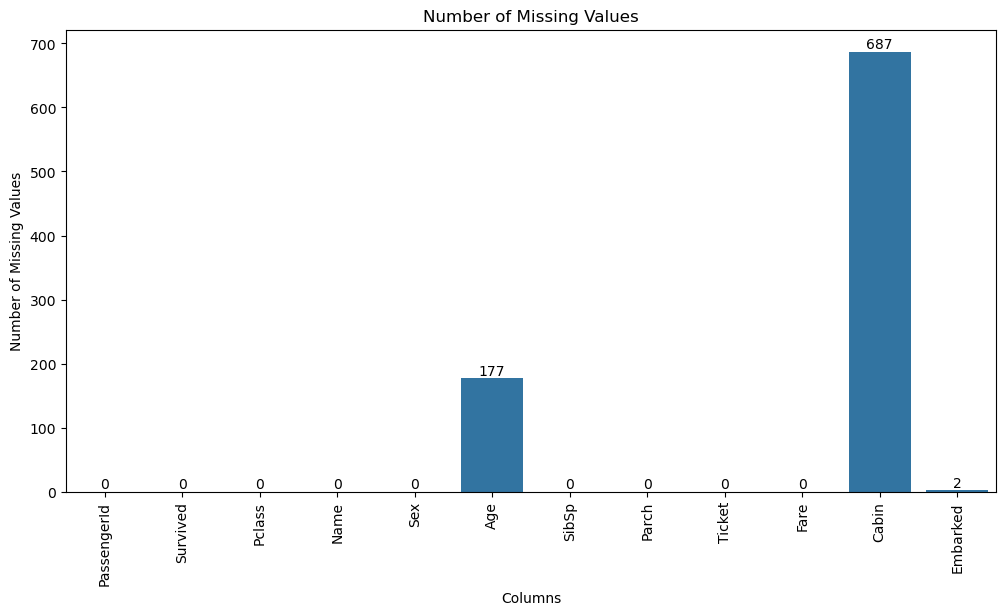

In [16]:
#Create a bar chart showing how many missing values are in each column

plt.figure(figsize=(12, 6))
sns.barplot(x=train_missng.index, y=train_missng.values)
plt.title('Number of Missing Values')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.bar_label(plt.gca().containers[0])
plt.xticks(rotation=90)
plt.show()

####  2. Which column has the most `NaN` values? How many cells in that column are empty?


In [74]:
# Find the column with the most NaN values
column_with_most_nans = train.isnull().sum().idxmax()
print(f"The column with the most NaN values is '{column_with_most_nans}'.")

The column with the most NaN values is 'Cabin'.


In [76]:
# Count the number of NaN values in that column
num_nan_in_column = train[column_with_most_nans].isnull().sum()
print(f"It has {num_nan_in_column} empty cells.")

It has 687 empty cells.


####  3. Delete all rows where `Embarked` is empty

In [22]:
train = train.dropna(subset=['Embarked'])
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### 4. Fill all empty cabins with **¯\\_(ツ)_/¯**

Note: `NaN`, empty, and missing are synonymous.

In [24]:
train['Cabin'].replace(np.NaN, '¯\(ツ)/¯')

0      ¯\(ツ)/¯
1          C85
2      ¯\(ツ)/¯
3         C123
4      ¯\(ツ)/¯
        ...   
886    ¯\(ツ)/¯
887        B42
888    ¯\(ツ)/¯
889       C148
890    ¯\(ツ)/¯
Name: Cabin, Length: 889, dtype: object

In [26]:
(train['Cabin'] == '¯\(ツ)/¯').sum()

0

## Step 3: Feature extraction

#### 1.  There are two columns that pertain to how many family members are on the boat for a given person. Create a new column called `FamilyCount` which will be the sum of those two columns.

In [28]:
train[['SibSp','Parch']]

,SibSp,Parch
0,1,0
1,1,0
2,0,0
3,1,0
4,0,0
...,...,...
886,0,0
887,0,0
888,1,2
889,0,0


In [30]:
train["FamilyCount"] = train['SibSp'] + train['Parch']

/var/folders/nn/t34vnl3j7s55g01hxh4lkb340000gn/T/ipykernel_8810/2325673991.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["FamilyCount"] = train['SibSp'] + train['Parch']


In [36]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0


#### 2. Reverends have a special title in their name. Create a column called `IsReverend`: 1 if they're a preacher, 0 if they're not.


In [38]:
train['IsReverend'] = train['Name'].str.contains('Rev.').astype(int)

/var/folders/nn/t34vnl3j7s55g01hxh4lkb340000gn/T/ipykernel_8810/3179033972.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['IsReverend'] = train['Name'].str.contains('Rev.').astype(int)


In [40]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,0


#### 3. In order to feed our training data into a classification algorithm, we need to convert our categories into 1's and 0's using `pd.get_dummies`.

  - Familiarize yourself with the [**`pd.get_dummies` documentation**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)
  - Create 3 columns: `Embarked_C`, `Embarked_Q` and `Embarked_S`. These columns will have 1's and 0's that correspond to the `C`, `Q` and `S` values in the `Embarked` column
  - Do the same thing for `Sex`
  - BONUS (required): Extract the title from everyone's name and create dummy columns

In [42]:
embarked_dummies = pd.get_dummies(train['Embarked'], prefix='Embarked')

In [44]:
train = pd.concat([train, embarked_dummies], axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,False,False,True


## Step 4: Exploratory analysis

_[`df.groupby()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) may be very useful._

#### 1. What was the survival rate overall?


In [84]:
survival_rate = train['Survived'].mean()
print(f" survival rate {survival_rate}.")

 survival rate 0.38245219347581555.


#### 2. Which gender fared the worst? What was their survival rate?

In [88]:
survival_rate_by_gender = train.groupby('Sex')['Survived'].mean()*100
survival_rate_by_gender

Sex
female    74.038462
male      18.890815
Name: Survived, dtype: float64

In [92]:
worst_gender = survival_rate_by_gender.idxmin()
print(f"survival_by_gender: {worst_gender}")

worst_survival_rate = survival_rate_by_gender.min()
print(f"survival_rate_by_gender: {worst_survival_rate} %")

survival_by_gender: male
survival_rate_by_gender: 18.890814558058924 %


#### 3. What was the survival rate for each `Pclass`?

In [73]:
survival_rate_by_pclass = train.groupby('Pclass')['Survived'].mean()
print (survival_rate_by_pclass )

Pclass
1    0.626168
2    0.472826
3    0.242363
Name: Survived, dtype: float64


#### 4. Did any reverends survive? How many?`

In [94]:
reverend_survival = train[train['Name'].str.contains('Rev.')]['Survived'].sum()
print(f"Number of reverends who survived: {reverend_survival}")

Number of reverends who survived: 0


#### 5. What is the survival rate for cabins marked **¯\\_(ツ)_/¯**

In [96]:
cabin_survival_rate = train[train['Cabin'] == '¯\(ツ)/¯']['Survived'].mean()
print(f"The survival rate for cabins marked '¯\(ツ)/¯' is: {cabin_survival_rate:.2f}")

The survival rate for cabins marked '¯\(ツ)/¯' is: nan


#### 6. What is the survival rate for people whose `Age` is empty?

In [83]:
survival_rate_missing_age = train[train['Age'].isnull()]['Survived'].mean()
print(survival_rate_missing_age)

0.2937853107344633


####  7. What is the survival rate for each port of embarkation?

In [85]:
survival_rate_by_embarked = train.groupby('Embarked')['Survived'].mean()
print (survival_rate_by_embarked)

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


#### 8. What is the survival rate for children (under 12) in each `Pclass`?

In [93]:
children = train[train['Age'] < 12]
print (children)

     PassengerId  Survived  Pclass                                      Name  \
7              8         0       3            Palsson, Master. Gosta Leonard   
10            11         1       3           Sandstrom, Miss. Marguerite Rut   
16            17         0       3                      Rice, Master. Eugene   
24            25         0       3             Palsson, Miss. Torborg Danira   
43            44         1       2  Laroche, Miss. Simonne Marie Anne Andree   
..           ...       ...     ...                                       ...   
827          828         1       2                     Mallet, Master. Andre   
831          832         1       2           Richards, Master. George Sibley   
850          851         0       3   Andersson, Master. Sigvard Harald Elias   
852          853         0       3                   Boulos, Miss. Nourelain   
869          870         1       3           Johnson, Master. Harold Theodor   

        Sex   Age  SibSp  Parch        

In [95]:
survival_rate_children_by_pclass = children.groupby('Pclass')['Survived'].mean()
print(survival_rate_children_by_pclass)

Pclass
1    0.750000
2    1.000000
3    0.404255
Name: Survived, dtype: float64


####  9. Did the captain of the ship survive? Is he on the list?

In [97]:
captain_rows = train[train['Name'].str.contains('Capt.')]
captain_rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0,B22,S,2


#### 10. Of all the people that died, who had the most expensive ticket? How much did it cost?

In [106]:
deceased = train[train['Survived'] == 0]

In [114]:
most_expensive_deceased = deceased.sort_values(by='Fare', ascending=False,axis=0).iloc[0]
name = most_expensive_deceased['Name'] 
fare = most_expensive_deceased['Fare']
print(f"The person who died with the most expensive ticket was {name} and it cost ${fare:.2f}.")

The person who died with the most expensive ticket was Fortune, Mr. Charles Alexander and it cost $263.00.


#### 11. Does having family on the boat help or hurt your chances of survival?

In [46]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,False,False,True


In [70]:
# Calculate survival rates based on FamilyCount
family_survival_rate = train.groupby('FamilyCount')['Survived'].mean()*100

# Display the survival rates
print(family_survival_rate)

FamilyCount
0     30.093458
1     55.279503
2     57.843137
3     72.413793
4     20.000000
5     13.636364
6     33.333333
7      0.000000
10     0.000000
Name: Survived, dtype: float64


## Step 5: Plotting
Using Matplotlib and Seaborn, create multiple charts showing the survival rates of different groups of people. It's fine if a handful of charts are basic (Gender, Age, etc), but what we're really looking for is something beneath the surface.


/var/folders/nn/t34vnl3j7s55g01hxh4lkb340000gn/T/ipykernel_8810/3690849307.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=train, palette={'male': '#0096c7', 'female': '#ffafcc'})


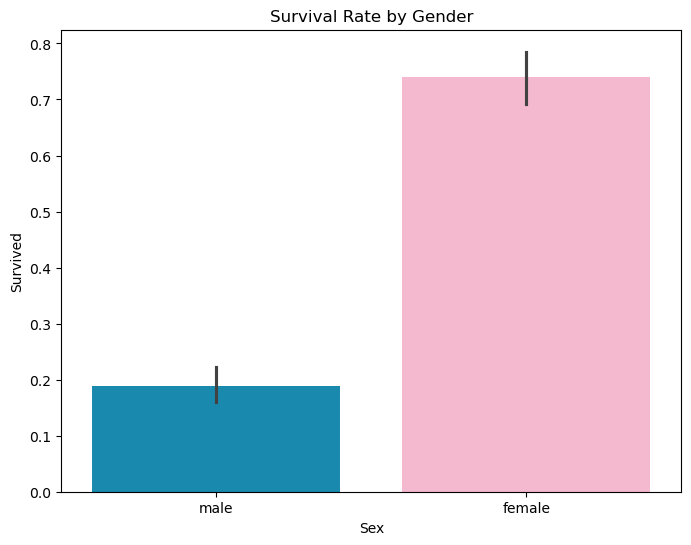

In [124]:
# Assuming your DataFrame is named 'train'
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Survived', data=train, palette={'male': '#0096c7', 'female': '#ffafcc'})
plt.title('Survival Rate by Gender')
plt.show()

/var/folders/nn/t34vnl3j7s55g01hxh4lkb340000gn/T/ipykernel_8810/315321332.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AgeGroup', y='Survived', data=train, palette=("Set2"))


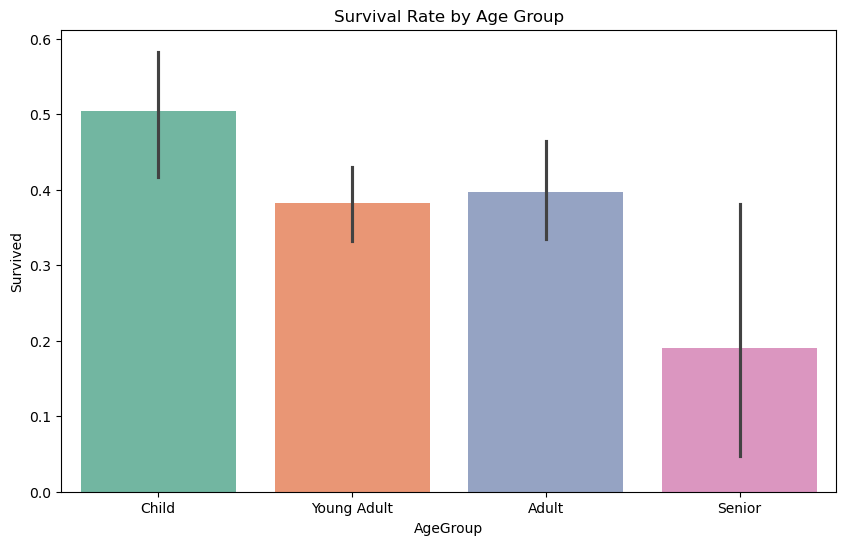

In [126]:
# Survival Rate by Age Group
train['AgeGroup'] = pd.cut(train['Age'], bins=[0, 18, 35, 60, 100], labels=['Child', 'Young Adult', 'Adult', 'Senior'])
plt.figure(figsize=(10, 6))
sns.barplot(x='AgeGroup', y='Survived', data=train, palette=("Set2"))
plt.title('Survival Rate by Age Group')
plt.show()

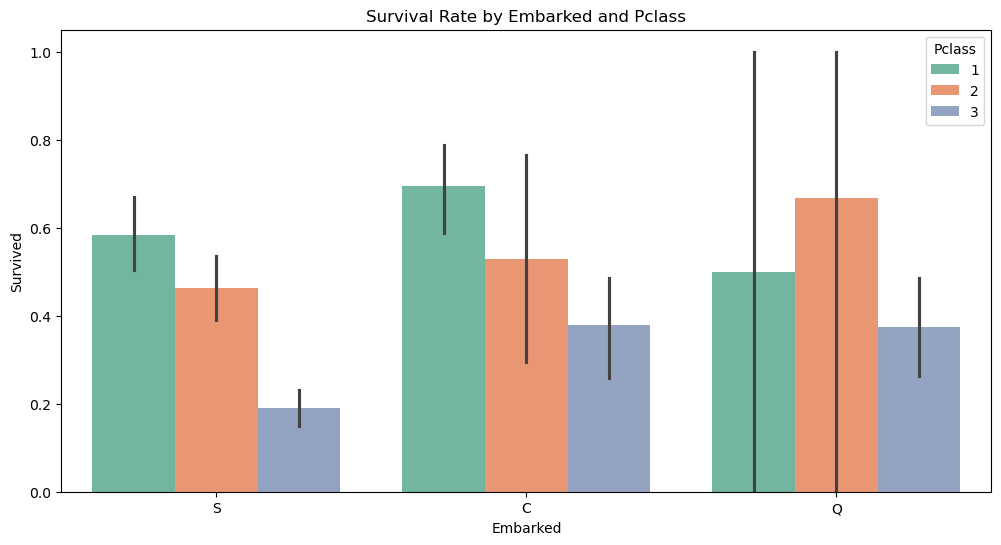

In [128]:
# Survival rate by Embarked and Pclass
plt.figure(figsize=(12, 6))
sns.barplot(x='Embarked', y='Survived', hue='Pclass', data=train, palette=("Set2"))
plt.title('Survival Rate by Embarked and Pclass')
plt.show()

/var/folders/nn/t34vnl3j7s55g01hxh4lkb340000gn/T/ipykernel_8810/2261027452.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='FamilySize', y='Survived', data=train, palette=("Set2"))


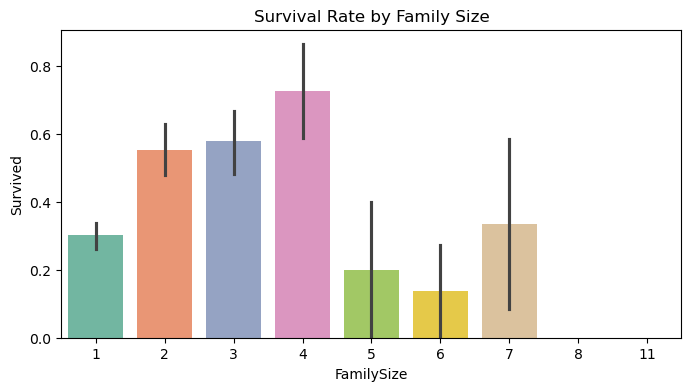

In [130]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
plt.figure(figsize=(8, 4))
sns.barplot(x='FamilySize', y='Survived', data=train, palette=("Set2"))
plt.title('Survival Rate by Family Size')
plt.show()

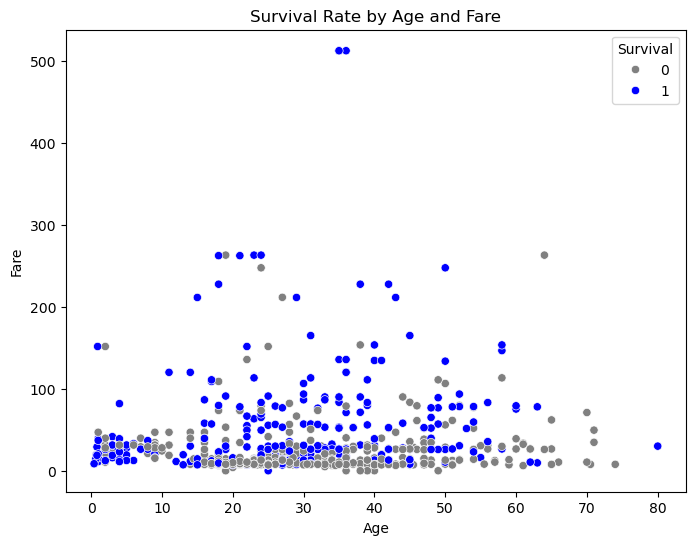

In [142]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=train, palette={0: 'gray', 1: 'blue'})
plt.title('Survival Rate by Age and Fare')
plt.legend(title='Survival')
plt.show()